#Programming Assignment1

In [65]:
import re
import numpy as np


In [66]:
lut_symbols = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

In [67]:
def replace_single_quotes(text):
    # Use regular expressions to find and replace ' after alphabetic characters
    modified_text = re.sub(r'([a-zA-Z])\'', r'~\1', text)
    modified_text = modified_text.replace('+','|')
    modified_text = modified_text.replace('*','&')
    return modified_text

def extract_variables(expression):
    # Use regular expressions to find variable names
    variable_pattern = r'\b[a-zA-Z_][a-zA-Z0-9_]*\b'
    variables = re.findall(variable_pattern, expression)

    # Remove duplicates by converting to a set and then back to a list
    unique_variables = list(set(variables))

    # Sort the variables alphabetically
    unique_variables.sort()

    return unique_variables

def replace_single_quotes2(text):
    # Use regular expressions to find and replace ' after alphabetic characters
    modified_text = text.replace('~',' not ')
    modified_text = modified_text.replace('|',' or ')
    modified_text = modified_text.replace('&',' and ')
    return modified_text

def get_bits_with_fixed_length(number, lenght):
    # Get the binary representation of the number
    bits = []
    while number:
        bits.append(number & 1)
        number >>= 1
    bits.reverse()

    # Calculate the number of leading zeros to add
    leading_zeros = [0] * (lenght - len(bits))

    # Combine leading zeros and the actual bits
    result = leading_zeros + bits

    return result


def get_truth_table(user_input):
  var_list = extract_variables(replace_single_quotes(user_input))
  table_list=[]
  for j in range(2**(len(var_list))):
    number_bits= get_bits_with_fixed_length(j, len(var_list))
    temp = replace_single_quotes(user_input)
    for i in range(len(var_list)):
      temp = temp.replace(var_list[i], str(number_bits[i]))
    temp = temp.replace("~1", "0").replace("~0","1")
    table_list.append(eval(temp))
  return table_list

def SOP(user_input):
  SOP_Index=[]
  truth_table = get_truth_table(user_input)
  for i in range(len(truth_table)):
    if truth_table[i]:
      SOP_Index.append(i);
  sigma_sign = '\u03A3'
  # print(" Canonical SOP = "+sigma_sign+str(SOP_Index).replace('[','(').replace(']',')'))
  return SOP_Index

def POS(user_input):
  POS_Index=[]
  truth_table = get_truth_table(user_input)
  for i in range(len(truth_table)):
    if truth_table[i]==0:
      POS_Index.append(i);
  #print(" Canonical POS = "+"PI"+str(POS_Index).replace('[','(').replace(']',')'))
  return POS_Index

def INVERSE_SOP(user_input):
  INVERSE_SOP_Index=[]
  truth_table = get_truth_table(user_input)
  for i in range(len(truth_table)):
    if truth_table[i]==0:
      INVERSE_SOP_Index.append(i);
  return INVERSE_SOP_Index

def INVERSE_POS(user_input):
  INVERSE_POS_Index=[]
  truth_table = get_truth_table(user_input)
  for i in range(len(truth_table)):
    if truth_table[i]:
      INVERSE_POS_Index.append(i);
  return INVERSE_POS_Index


from IPython.core.display import deepcopy

def mul(x,y):
    res = []
    for i in x:
        if i+"'" in y or (len(i)==2 and i[0] in y):
            return []
        else:
            res.append(i)
    for i in y:
        if i not in res:
            res.append(i)
    return res

def multiply(x,y):
    res = []
    for i in x:
        for j in y:
            tmp = mul(i,j)
            res.append(tmp) if len(tmp) != 0 else None
    return res

def EPI_finging(x):
    res = []
    for i in x:
        if len(x[i]) == 1:
            res.append(x[i][0]) if x[i][0] not in res else None
    return res

def get_var(x):
    var_list = []
    for i in range(len(x)):
        if x[i] == '0':
            var_list.append(chr(i+65)+"'")
        elif x[i] == '1':
            var_list.append(chr(i+65))
    return var_list

def flatten(x):
    flattened_items = []
    for i in x:
        flattened_items.extend(x[i])
    return flattened_items

def get_minterms(a):
    gaps = a.count('-')
    if gaps == 0:
        return [str(int(a,2))]
    x = [bin(i)[2:].zfill(gaps) for i in range(pow(2,gaps))]
    temp = []
    for i in range(pow(2,gaps)):
        temp2,ind = a[:],-1
        for j in x[0]:
            if ind != -1:
                ind = ind+temp2[ind+1:].find('-')+1
            else:
                ind = temp2[ind+1:].find('-')
            temp2 = temp2[:ind]+j+temp2[ind+1:]
        temp.append(str(int(temp2,2)))
        x.pop(0)
    return temp

def compare(a,b):
    c = 0
    for i in range(len(a)):
        if a[i] != b[i]:
            mismatch_index = i
            c += 1
            if c>1:
                return (False,None)
    return (True,mismatch_index)

def remove_Item(_chart,terms):
    for i in terms:
        for j in get_minterms(i):
            try:
                del _chart[j]
            except KeyError:
                pass

def Quine_McCluskey(user_input):

  minterms = SOP(user_input);
  size = len(extract_variables(user_input));
  primeImplicant_List=[]
  Lists=[]
  for i in range(size+1):
    Lists.append([])
  for minterm in minterms:
          Lists[bin(minterm).count('1')].append(bin(minterm)[2:].zfill(size))
  while True:
    temp=[];
    temp_Lists=deepcopy(Lists);
    Lists=[]
    for i in range(size+1):
      Lists.append([])
    m=0;
    marked=[];
    local_unmarked=[];
    should_stop = True;
    for i in range(size+1):
      temp.append(i)
    for i in range(len(temp)-1):
            for j in temp_Lists[temp[i]]:
                for k in temp_Lists[temp[i+1]]:
                    res = compare(j,k)
                    if res[0]:
                        try:
                            Lists[m].append(j[:res[1]]+'-'+j[res[1]+1:]) if j[:res[1]]+'-'+j[res[1]+1:] not in Lists[m] else None
                        except KeyError:
                            Lists[m] = [j[:res[1]]+'-'+j[res[1]+1:]]
                        should_stop = False
                        if j not in marked:
                          marked.append(j)
                        if k not in marked:
                          marked.append(k)
            m += 1
    local_unmarked=[]
    for item in temp_Lists:
      for item2 in item:
        if item2 not in marked:
          local_unmarked.append(item)
    for item in local_unmarked:
      if item not in primeImplicant_List:
        primeImplicant_List.append(item)
    if should_stop:
        break

  primeImplicant = []
  for item in primeImplicant_List:
    for item2 in item:
      primeImplicant.append(item2)
  sz = len(str(minterms[-1]))
  chart = {}
  for i in primeImplicant:
      merged_minterms,y = get_minterms(i),0
      for j in merged_minterms:
          x = minterms.index(int(j))*(sz+1)
          y = x+sz
          try:
              chart[j].append(i) if i not in chart[j] else None
          except KeyError:
              chart[j] = [i]
  EPI = EPI_finging(chart)
  remove_Item(chart,EPI)
  if(len(chart) == 0):
      ESS_PI = [get_var(i) for i in EPI]
  else:
      P = [[get_var(j) for j in chart[i]] for i in chart]
      while len(P)>1:
          P[1] = multiply(P[0],P[1])
          P.pop(0)
      ESS_PI = [min(P[0],key=len)]
      ESS_PI.extend(get_var(i) for i in EPI)
  return primeImplicant, ESS_PI



def minimized_SOP(user_input):
  sop_num=len(SOP(user_input))
  minimum_num=len(Quine_McCluskey(user_input)[1])
  print("number of saved literals =",minimum_num,"number of the canonical version=", sop_num)


def minimized_POS(user_input):
  Pos_num=len(POS(user_input))
  maxterm_num=len(Quine_McCluskey("~("+user_input+")")[1])
  print("number of saved literals =",maxterm_num,"number of the canonical version=", Pos_num)


def findPrimeImplicants(user_input):
  minimum_num=len(Quine_McCluskey(user_input)[0])
  print("number of Prime implicants are: ",minimum_num)

def findEssPrimeImplicants(user_input):
  minimum_num=len(Quine_McCluskey(user_input)[1])
  print("number of Essential Prime implicants are: ",minimum_num)

def onSetMinterms(user_input):
  print("the number of Onset_minterms =",sum(get_truth_table(user_input)))

def OnSetMaxterms(user_input):
  print("the number of Onset_maxterms =", sum([1 if x == 0 else 0 for x in get_truth_table(user_input)]))

def numberOfActiveInputs(user_input):
    elements=[]
    temp2=0
    for i in range(len(user_input)):
      if user_input[i] != "(" and user_input[i] != ")"  and user_input[i] != "~" and user_input[i] != "+" and user_input[i] != "*" and user_input[i] not in elements:
        elements.append(user_input[i])
        temp2 = temp2+1
    return temp2,elements

def getEssPrimeImplicantExpression(user_input):
  temp = Quine_McCluskey(user_input)[1]
  a=""
  for item in temp:
    if len(item)==1:
      if a == "":
        a=a+str(item[0])
      else:
        a=a+"+"+str(item[0])
    else:
      for i in range(len(item)):
        if i==0:
          if a=="":
            a=a+str(item[i])
          else:
            a=a+"+"+str(item[i])
        else:
          a = a + "&" + str(item[i])
  return a


def AIG():
  class AIGNode:
      def __init__(self, node_type, inputs):
          self.node_type = node_type
          self.inputs = inputs

  def aig_to_string(node_map, node_id):
      node = node_map[node_id]

      if node.node_type == "Input":
          return node.inputs
      elif node.node_type == "Inverter":
          input_node = node_map[node.inputs[0]]
          input_str = aig_to_string(node_map, node.inputs[0])
          return f"(~{input_str})"
      elif node.node_type == "AND":
          input1_str = aig_to_string(node_map, node.inputs[0])
          input2_str = aig_to_string(node_map, node.inputs[1])
          return f"({input1_str} * {input2_str})"
      else:
          return ""
  # Ask the user for the node_map and output_node_id
  node_map = {}
  while True:
      try:
          node_id = int(input("Enter node ID (or -1 to stop): "))
          if node_id == -1:
              break
          node_type = input("Enter node type (Input, Inverter, AND): ")
          if node_type == "Input":
              input_name = input("Enter input name: ")
              node = AIGNode(node_type, input_name)
          else:
              input_ids = input("Enter input node IDs (comma-separated): ").divide_main(",")
              input_ids = [int(id) for id in input_ids]
              node = AIGNode(node_type, input_ids)
          node_map[node_id] = node
      except ValueError:
          print("Invalid input. Please enter a valid node ID and input values.")

  output_node_id = int(input("Enter the output node ID: "))


  expression = aig_to_string(node_map, output_node_id)
  return expression



#Programming assignment2

In [68]:
pip install networkx

In [69]:
level=0

In [70]:
class LUT:
    def __init__(self,Function,inputs,output,input_number,ext,name):

        if len(inputs) <=input_number:
            self.Input_num = input_number
            self.name = name
            self.Function = Function
            self.inputs=inputs
            self.output=output
            self.FPGA_Output=ext
        else:
            print("Error")

In [71]:
second_lut_num=0

In [72]:
def create_LUTs(num_luts,input_number):

    global LUTs
    global second_lut_num
    LUTs=[]
    second_lut_num=0
    for i in range(num_luts):
        LUTs.append(LUT("",[],chr(ord('a')+i),input_number," ","LUT_num = "+str(i)))


In [73]:
def display_all_LUTs():

    global LUTs
    global second_lut_num
    global lut_symbols

    for i in range(second_lut_num):
        print()
        print(LUTs[i].name)
        print(LUTs[i].output +" = "+ LUTs[i].Function)
        print("lUT is "+ str(LUTs[i].Input_num)+"input")
        print("output= ", LUTs[i].output)
        print("External Output: "+LUTs[i].FPGA_Output)
        print()



In [74]:
def display_Lut(index):
    print(LUTs[index].name)
    print("lUT is "+ str(LUTs[index].Input_num)+"input")
    print("FUNCTION: "+LUTs[index].Function)
    print("INPUTS: "+str(LUTs[index].inputs))
    print("OUTPUT: "+LUTs[index].output)

In [75]:
from collections import Counter
def string_compare(str1,str2):
  if (get_truth_table(str1)==get_truth_table(str2)) and Counter(numberOfActiveInputs(str1)[1])==Counter(numberOfActiveInputs(str2)[1]):
    return True
  else:
    return False


In [76]:

def divide__(function):
    open=0

    for i in range(len(function)):
        if function[i]=="(":
            open+=1
        if function[i]==")":
            open-=1
        if function[i]=="+" and open==0:
            return True
    return False


def divide_main__(function):
    j=0
    divide_func=[function]
    open=0
    last_index=0
    for i in range(len(function)):
        if function[i]=="(":
            open+=1
        if function[i]==")":
            open-=1
        if function[i]=="+"and open==0:
            divide_func.append(function[i+1:])
            divide_func[j]=function[last_index:i]
            last_index=i+1
            j+=1

    return divide_func

def divide_p(function):
    j=0
    divide_func=[function]
    open=0
    last_index=0
    if function[0]=="(":
        function=function[1:]
        open+=1

    for i in range(len(function)):


        if function[i]=="(":

            if open==0 and not(i==0) and len(divide_func)==1:
                divide_func.append(function[i+1:])
                divide_func[j]=function[last_index:i]
                last_index=i+1
                j+=1

            open+=1

        if function[i]==")":
            open-=1

            if(open==0) and i==len(function)-1:
                divide_func[j]=divide_func[j][0:len(divide_func[j])-1]

            if open==0 and not(i==len(function)-1):
                divide_func.append(function[i+2:])
                divide_func[j]=function[last_index:i]
                last_index=i+2
                j+=1

    return divide_func

def divide_main(function):
    global LUTs
    global second_lut_num
    global level
    global ext_out
    level+=1


    if function[1]=="=":
        level=1
        ext_out=function[0]
        function=function[3:]


    if numberOfActiveInputs(function)[0]==1:
        return ""

    elif numberOfActiveInputs(function)[0]<=LUTs[0].Input_num:
        LUTs[second_lut_num].Function=function
        LUTs[second_lut_num].inputs= numberOfActiveInputs(function)[1]
        if level==1:
            LUTs[second_lut_num].FPGA_Output=ext_out
            if second_lut_num != 0 :
              LUTs[second_lut_num].FPGA_Output=""
        second_lut_num+=1

        return(LUTs[second_lut_num-1].output)

    elif divide__(function):

        divide_func=divide_main__(function)


        inputs_devision=np.zeros(len(divide_func))
        for i in range(len(divide_func)):
            inputs_devision[i]=numberOfActiveInputs(divide_func[i])[0]

            if inputs_devision[i]==LUTs[0].Input_num:

                next_function=""
                for j in range(len(divide_func)):

                    if i>j:
                        next_function+=divide_func[j]+"+"
                    elif i==j:
                        next_function+=divide_main(divide_func[j])
                    if j>i:

                        next_function+="+"+divide_func[j]

                level=0
                return divide_main(next_function)

        for i in range(2**(len(inputs_devision))):
            temp_code=str(bin(i))
            temp_code=temp_code[2:]
            code=""
            for j in range(0,len(inputs_devision)-len(temp_code)):
                code+='0'
            code+=temp_code

            sum=0
            four_input_function=""
            rest_of_function=""
            for j in range(len(code)):
                if code[j]=="1":
                    sum+=inputs_devision[j]
                    four_input_function+=divide_func[j]+'+'
                else:
                    rest_of_function+=divide_func[j]+'+'
            if sum==LUTs[0].Input_num:

                four_input_function=four_input_function[:len(four_input_function)-1]
                temp=divide_main(four_input_function)
                level=0
                return divide_main(rest_of_function+temp)

        for i in range(len(inputs_devision)):
            if inputs_devision[i]>LUTs[0].Input_num:

                next_function=""
                for j in range(len(divide_func)):


                    if i>j:
                        next_function+=divide_func[j]+"+"
                    elif i==j:
                        next_function+=divide_main(divide_func[j])
                    if j>i:

                        next_function+="+"+divide_func[j]
                level=0
                return divide_main(next_function)

        if LUTs[0].Input_num==4:
          for i in range(len(inputs_devision)):
              if inputs_devision[i]==3:
                  LUTs[second_lut_num].Function=divide_func[i]
                  LUTs[second_lut_num].inputs= numberOfActiveInputs(divide_func[i])[1]
                  LUTs[second_lut_num].output=str(second_lut_num)
                  if level==1:
                      LUTs[second_lut_num].FPGA_Output=ext_out
                      if second_lut_num != 0 :
                          LUTs[second_lut_num].FPGA_Output=""
                  second_lut_num+=1
                  next_function=""
                  for j in range(len(divide_func)):


                      if i>j:
                          next_function+=divide_func[j]+"+"
                      elif i==j:
                          next_function+=LUT[second_lut_num-1].output
                      if j>i:

                          next_function+="+"+divide_func[j]

                  level=0
                  return(divide_main(next_function))

          LUTs[second_lut_num].Function=function
          LUTs[second_lut_num].inputs= numberOfActiveInputs(function)[1]
          if level==1:
              LUTs[second_lut_num].FPGA_Output=ext_out
          second_lut_num+=1

          level=0
          return(LUTs[second_lut_num-1].output)
        else:
          if np.sum(inputs_devision) < 6:
              LUTs[second_lut_num].Function=function
              LUTs[second_lut_num].inputs= numberOfActiveInputs(function)[1]
              second_lut_num+=1
              return lut_symbols[second_lut_num-1]
          max=np.max(inputs_devision)
          index=np.where(inputs_devision==max)
          index=index[0][0]
          next_function=""

          LUTs[second_lut_num].Function=divide_func[index]
          LUTs[second_lut_num].inputs= numberOfActiveInputs(divide_func[index])[1]
          second_lut_num+=1


          for j in range(len(divide_func)):

              if index>j:
                  next_function+=divide_func[j]+"+"
              elif index==j:

                  next_function+=lut_symbols[second_lut_num-1]
              if j>index:

                  next_function+="+"+divide_func[j]

          return divide_main(next_function)

    elif not(function.find("(")==-1):

        divide_func=divide_p(function)


        inputs_devision=np.zeros(len(divide_func))

        for i in range(len(divide_func)):
            inputs_devision[i]=numberOfActiveInputs(divide_func[i])[0]

            if inputs_devision[i]==LUTs[0].Input_num:

                next_function=""
                for j in range(len(divide_func)):


                    if i>j:
                        next_function+="("+divide_func[j]+")"
                    elif i==j:
                        next_function+="("+divide_main(divide_func[j])+")"
                    if j>i:

                        next_function+="("+divide_func[j]+")"

                level=0
                return divide_main(next_function)

        for i in range(2**(len(inputs_devision))):
            temp_code=str(bin(i))
            temp_code=temp_code[2:]
            code=""
            for j in range(0,len(inputs_devision)-len(temp_code)):
                code+='0'
            code+=temp_code


            sum=0
            four_input_function=""
            rest_of_function=""
            for j in range(len(code)):
                if code[j]=="1":
                    sum+=inputs_devision[j]
                    four_input_function+="("+divide_func[j]+")"
                else:
                    rest_of_function+="("+divide_func[j]+")"

            if sum==LUTs[0].Input_num:
                four_input_function=four_input_function[:len(four_input_function)]
                temp=divide_main(four_input_function)
                level=0

                return divide_main(rest_of_function+"("+temp+")")

        for i in range(len(inputs_devision)):
            if inputs_devision[i]>LUTs[0].Input_num:

                next_function=""
                for j in range(len(divide_func)):


                    if i>j:
                        next_function+="("+divide_func[j]+")"
                    elif i==j:
                        next_function+="("+divide_main(divide_func[j])+")"
                    if j>i:

                        next_function+="("+divide_func[j]+")"

                level=0
                return divide_main(next_function)

        if(LUTs[0].Input_num==4):
          for i in range(len(inputs_devision)):
              if inputs_devision[i]==3:
                  LUTs[second_lut_num].Function=divide_func[i]
                  LUTs[second_lut_num].inputs= numberOfActiveInputs(divide_func[i])[1]
                  if level==1:
                      LUTs[second_lut_num].FPGA_Output=ext_out
                  second_lut_num+=1
                  next_function=""
                  for j in range(len(divide_func)):


                      if i>j:
                          next_function+="("+divide_func[j]+")"
                      elif i==j:
                          next_function+="("+LUTs[second_lut_num-1].output+")"
                      if j>i:

                          next_function+="("+divide_func[j]+")"
                  level=0
                  return(divide_main(next_function))

          LUTs[second_lut_num].Function=function
          LUTs[second_lut_num].inputs= numberOfActiveInputs(function)[1]
          if level==1:
              LUTs[second_lut_num].FPGA_Output=ext_out
              if second_lut_num != 0 :
                LUTs[second_lut_num].FPGA_Output=""
        else:
          max=np.max(inputs_devision)
          index=np.where(inputs_devision==max)
          index=index[0][0]
          next_function=""
          LUTs[second_lut_num].Function=divide_func[index]
          LUTs[second_lut_num].inputs= numberOfActiveInputs(divide_func[index])[1]
        second_lut_num+=1
        return(LUTs[second_lut_num-1].output)

    next_function="("
    for i in range(len(function)):
        if i==len(function)-1 and not(function[i]=="'"):
            next_function+=function[i]+")"
        elif (letters.count(function[i]) or lut_symbols.count(function[i])):
            next_function+=function[i]
            if function[i+1]=="'":
                next_function+="'"
            next_function+=")("
    if next_function[-1]=="(":
        next_function=next_function[:len(next_function)-1]
    return(divide_main(next_function))

In [77]:
def map_Lut(functions,num_luts,input_number):
    global level
    global second_lut_num
    create_LUTs(num_luts,input_number)
    for i in range(len(functions)):
        level=0
        divide_main(functions[i])
        LUTs[second_lut_num-1].FPGA_Output=functions[i][0]
    for i in range(second_lut_num):
      LUTs[i].inputs = numberOfActiveInputs(LUTs[i].Function)[1]
    for i in range(second_lut_num):
      for j in range(len(LUTs[i].Function)-1):
        if LUTs[i].Function[j] == '*'and LUTs[i].Function[j+1]==')':
          s= ""
          for k in range(len(LUTs[i].Function)):
            if k ==j:
              s = s + ')'
              if j + 1 != len(LUTs[i].Function)-1:
                s = s + '*'
            else:
              if k !=j+1:
                s = s + LUTs[i].Function[k]
          LUTs[i].Function = s;

In [78]:
import networkx as nx
import matplotlib.pyplot as plt


def draw(LUTs):
  # Create a directed graph using networkx
  lut_graph = nx.DiGraph()

  # Add nodes to the graph
  for i in range(second_lut_num):
      lut_graph.add_node(LUTs[i].output + "  Out="+LUTs[i].FPGA_Output, label=LUTs[i].name)

  # Add edges to represent relationships
  for i in range (second_lut_num):
    for j in range(second_lut_num):
      if LUTs[i].output in LUTs[j].inputs:
        lut_graph.add_edge(LUTs[i].output+ "  Out="+LUTs[i].FPGA_Output, LUTs[j].output+ "  Out="+LUTs[j].FPGA_Output, input_connection="output1")

  # Draw the graph
  pos = nx.spring_layout(lut_graph)
  nx.draw(lut_graph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=20)

  # Display the graph
  plt.show()


In [79]:
def Encoder(LUT, Number_of_LUTs):
  Output_String = f'{Number_of_LUTs:08b}'
  Output_String += f'{11111111}'
  for i in range(Number_of_LUTs):
    LUT_Temp = LUT[i]
    Output_String += f'{LUT_Temp.Input_num:08b}'
    Function_list = list(LUT_Temp.Function)
    for j in range(len(Function_list)):
      Output_String += f'{ord(Function_list[j]):08b}'
    Output_String += f'{11111111}'
    for j in range(len(LUT_Temp.inputs)):
      Output_String += f'{ord(LUT_Temp.inputs[j]):08b}'
    Output_String += f'{11111111}'
    Output_String += f'{ord(LUT_Temp.output):08b}'
    if LUT_Temp.FPGA_Output=="":
      Output_String += f'{ord(" "):08b}'
    else:
      Output_String += f'{ord(LUT_Temp.FPGA_Output):08b}'

  return Output_String


In [80]:
def Decoder(Input_String):
  global LUTs
  global second_lut_num
  Number_of_LUTs = int(Input_String[0:8],2)
  second_lut_num = Number_of_LUTs
  Input_String = Input_String[16:]
  Input_num = int(Input_String[0:8], 2)
  Input_String = Input_String[8:]
  create_LUTs(Number_of_LUTs,Input_num)
  second_lut_num = Number_of_LUTs
  for i in range(Number_of_LUTs):
    Temp_8bit = Input_String[0:8]
    Temp_list = []
    while(Temp_8bit != '11111111'):
      Temp_list.append(chr(int(Temp_8bit, 2)))
      Input_String = Input_String[8:]
      Temp_8bit = Input_String[0:8]
    LUTs[i].Function = ''.join(Temp_list)
    Input_String = Input_String[8:]
    Temp_8bit = Input_String[0:8]
    Temp_list = []
    while(Temp_8bit != '11111111'):
      Temp_list.append(chr(int(Temp_8bit, 2)))
      Input_String = Input_String[8:]
      Temp_8bit = Input_String[0:8]
    LUTs[i].inputs = Temp_list
    Input_String = Input_String[8:]
    LUTs[i].output = chr(int(Input_String[0:8], 2))
    Input_String = Input_String[8:]
    LUTs[i].FPGA_Output = chr(int(Input_String[0:8], 2))
    Input_String = Input_String[16:]

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
def run():
  global LUTs
  global second_lut_num


  input_format = input("please enter the format of input: 1_bitstream 2_expression\n")
  if input_format=='1':
    # Define the file path
    file_path = '/content/drive/MyDrive/Programming assignment2/bitstream.txt'

    # Read the content of the file into a string
    with open(file_path, 'r') as file:
        file_content = file.read()

    # Print or use the content as needed
    Decoder(file_content)
    while True:
      input_command = input("\n\n\n commands: \n1. A list of functions assigned to the LUTs\n2. A list of internal connections\n3. A list of external input assignments\n4. A list of external output assignments\n5. A “bitstream” that would program your system\n6.  recourse allocation summary\n7.exit\n")
      match input_command :
          case '1':
            print("\n\n\n")
            while 1:
              input_command2 = input("\n\n\n commands: 1-show all the LUT assignments 2-show individual LUT assignments 3- exit command\n")
              match input_command2 :
                case '1':
                  display_all_LUTs();
                case '2':
                  LUT_Index =  int(input("\n\n\n enter LUT index"))
                  display_Lut(LUT_Index)
                case default:
                  break
          case '2':
            draw(LUTs)
          case '3':
            for i in range(second_lut_num):
              print(LUTs[i].name + ":\n")
              for j in range(len(LUTs[i].inputs)):
                print("in" + str(j)+" = ", LUTs[i].inputs[j])
              print("\n \n ")
          case '4':
              for i in range(second_lut_num):
                if LUTs[i].FPGA_Output != "":
                  print(LUTs[i].name + ":\n")
                  print(LUTs[i].output + " is assign to " + LUTs[i].FPGA_Output+"\n")
          case '5':
              bitstream = Encoder(LUTs, second_lut_num)
              # Define the file path
              file_path = '/content/drive/MyDrive/Programming assignment2/bitstream.txt'
              # Open the file in write mode and write the content
              with open(file_path, 'w') as file:
                  file.write(bitstream)
              # Print a message to confirm the operation
              print(f'The content has been written to {file_path}')

          case '6':
              temp = 0;
              temp2=0
              for i in range(second_lut_num):
                temp = temp + len(LUTs[i].inputs)
                temp2 = temp2 + LUTs[i].Input_num
              print("connections = " + str(temp*100/temp2) + "%" )
          case default:
              break
  elif input_format=='2':
    print("Welcome to hamed's Program:\n")
    LUT_NUM = input("Please enter the number of “LUTs” in your FPGA\n")

    while 1:
      LUT_TYPE = int(input("Plese enter The type of LUTs: 4_ 4 or 6_ 6 \n"))
      if LUT_TYPE != 4 and LUT_TYPE != 6:
        print("please enter 4 or 6\n")
      else:
        break
    print("This program only supports Fully connected LUTs\n")
    Number_input = input("please enter The number of inputs to your system \n")
    Number_output = input("Please enter The number of outputs to your system\n")
    expressions = []
    do = 1 ;
    while do==1:
      expression = input("please enter logic expressions: (enter -1 if your done)\n")
      if expression == '-1':
        do =0
      else:
        expressions.append(expression)
    map_Lut(expressions,int(LUT_NUM),LUT_TYPE)
    while True:
      input_command = input("\n\n\n commands: \n1. A list of functions assigned to the LUTs\n2. A list of internal connections\n3. A list of external input assignments\n4. A list of external output assignments\n5. A “bitstream” that would program your system\n6.  recourse allocation summary\n7.exit\n")
      match input_command :
          case '1':
            print("\n\n\n")
            while 1:
              input_command2 = input("\n\n\n commands: 1-show all the LUT assignments 2-show individual LUT assignments 3- exit command\n")
              match input_command2 :
                case '1':
                  display_all_LUTs();
                case '2':
                  LUT_Index =  int(input("\n\n\n enter LUT index"))
                  display_Lut(LUT_Index)
                case default:
                  break
          case '2':
            draw(LUTs)
          case '3':
            for i in range(second_lut_num):
              print(LUTs[i].name + ":\n")
              for j in range(len(LUTs[i].inputs)):
                print("in" + str(j)+" = ", LUTs[i].inputs[j])
              print("\n \n ")
          case '4':
              for i in range(second_lut_num):
                if LUTs[i].FPGA_Output != "":
                  print(LUTs[i].name + ":\n")
                  print(LUTs[i].output + " is assign to " + LUTs[i].FPGA_Output+"\n")
          case '5':
              bitstream = Encoder(LUTs, second_lut_num)
              # Define the file path
              file_path = '/content/drive/MyDrive/Programming assignment2/bitstream.txt'
              # Open the file in write mode and write the content
              with open(file_path, 'w') as file:
                  file.write(bitstream)
              # Print a message to confirm the operation
              print(f'The content has been written to {file_path}')

          case '6':
              print("LUT utilization = " + str(second_lut_num*100/int(LUT_NUM)) + "%" )
              temp = 0;
              temp2 = 0
              for i in range(second_lut_num):
                temp = temp + len(LUTs[i].inputs)
                temp2 = temp2 + LUTs[i].Input_num
              print("connections = " + str(temp*100/temp2) + "%" )
          case default:
              break
  else:
    print("invalid input format\n")

  return expressions




#run

please enter the format of input: 1_bitstream 2_expression
2
Welcome to hamed's Program:

Please enter the number of “LUTs” in your FPGA
10
Plese enter The type of LUTs: 4_ 4 or 6_ 6 
4
This program only supports Fully connected LUTs

please enter The number of inputs to your system 
7
Please enter The number of outputs to your system
2
please enter logic expressions: (enter -1 if your done)
F= A+B+C*(~D+E+F+H)
please enter logic expressions: (enter -1 if your done)
G= ~A*B+C*(~D+E+F+H)
please enter logic expressions: (enter -1 if your done)
-1



 commands: 
1. A list of functions assigned to the LUTs
2. A list of internal connections
3. A list of external input assignments
4. A list of external output assignments
5. A “bitstream” that would program your system
6.  recourse allocation summary
7.exit
1







 commands: 1-show all the LUT assignments 2-show individual LUT assignments 3- exit command
1

LUT_num = 0
a = ~D+E+F+H
lUT is 4input
output=  a
External Output:  


LUT_num = 1
b

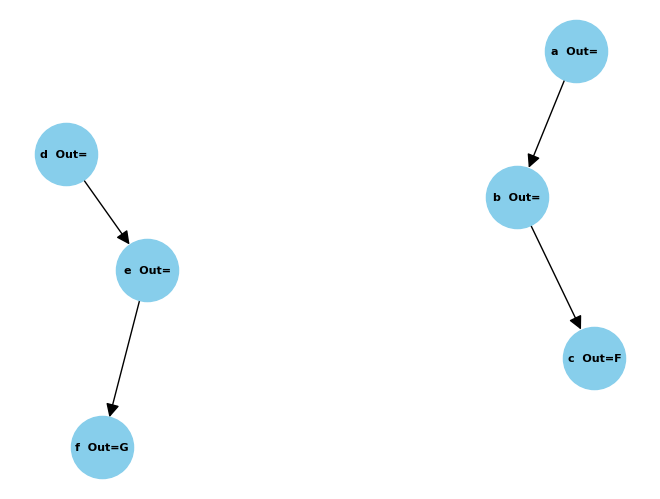




 commands: 
1. A list of functions assigned to the LUTs
2. A list of internal connections
3. A list of external input assignments
4. A list of external output assignments
5. A “bitstream” that would program your system
6.  recourse allocation summary
7.exit
3
LUT_num = 0:

in0 =  D
in1 =  E
in2 =  F
in3 =  H

 
 
LUT_num = 1:

in0 =  C
in1 =  a

 
 
LUT_num = 2:

in0 =  A
in1 =  B
in2 =  b

 
 
LUT_num = 3:

in0 =  D
in1 =  E
in2 =  F
in3 =  H

 
 
LUT_num = 4:

in0 =  C
in1 =  d

 
 
LUT_num = 5:

in0 =  A
in1 =  B
in2 =  e

 
 



 commands: 
1. A list of functions assigned to the LUTs
2. A list of internal connections
3. A list of external input assignments
4. A list of external output assignments
5. A “bitstream” that would program your system
6.  recourse allocation summary
7.exit
4
LUT_num = 0:

a is assign to  

LUT_num = 2:

c is assign to F

LUT_num = 3:

d is assign to  

LUT_num = 5:

f is assign to G




 commands: 
1. A list of functions assigned to the LUTs
2. A list o

['F= A+B+C*(~D+E+F+H)', 'G= ~A*B+C*(~D+E+F+H)']

In [100]:
run()